In [22]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cross_validation import cross_val_score
import numpy as np

In [7]:
data = pd.read_csv('../data/hr.csv')
print(data.head(5))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

Exploring data
Describe the data -> Finding Missing Value

In [8]:
print(data.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [9]:
print(data.corr())

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

<IPython.core.display.Javascript object>


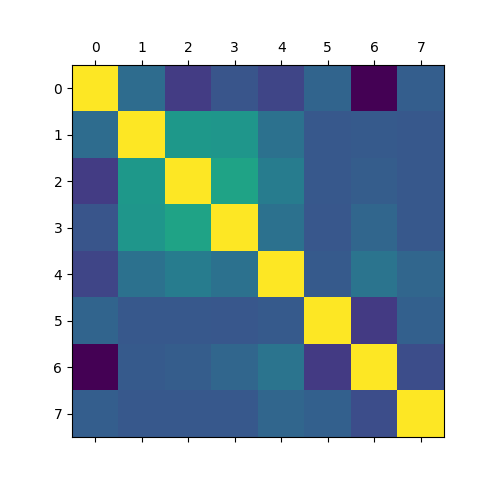

In [10]:
plt.matshow(data.corr())

In [11]:
data.drop('sales', axis=1, inplace=True)
data.drop('salary', axis=1, inplace=True)
print(data.head(5))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  
0                   3              0     1                      0  
1                   6              0     1                      0  
2                   4              0     1                      0  
3                   5              0     1                      0  
4                   3              0     1                      0  


In [12]:
# Prepare Dataset for Decision Tree Model
y = data['left']
x = data.drop('left', axis=1)

print("Y: ")
print(y.head(5))

print("-")

print("X: ")
print(x.head(5))

Y: 
0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64
-
X: 
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  
0                   3              0                      0  
1                   6              0                      0  
2                   4              0                      0  
3                   5              0                      0  
4                   3              0                      0  


In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
print("Accuracy Score: " + str(clf.score(x, y)))

Accuracy Score: 0.999866657777


In [27]:
cv = cross_val_score(clf, x, y, cv=10)
print(cv)

[ 0.98600933  0.98666667  0.972       0.966       0.95866667  0.982
  0.98666667  0.99133333  0.99933289  1.        ]


<IPython.core.display.Javascript object>


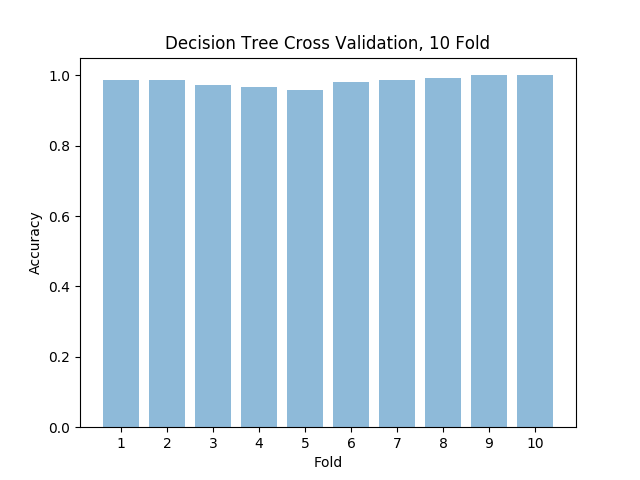

In [31]:
objects = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(objects))
performance = cv
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Decision Tree Cross Validation, 10 Fold')
 
plt.show()

In [50]:
cva = np.array(cv)
mean = np.mean(cva)
std = np.std(cva)
print("Mean: " + str(mean))
print("Standard Deviation: " + str(std))

Mean: 0.982867554904
Standard Deviation: 0.0128999547552


In [34]:
fi = clf.feature_importances_
print(fi)

[  4.98832652e-01   1.53140068e-01   1.06280532e-01   9.73993953e-02
   1.42473342e-01   1.85977360e-03   1.42367501e-05]


In [37]:
headers = list(x)
print(headers)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


<IPython.core.display.Javascript object>


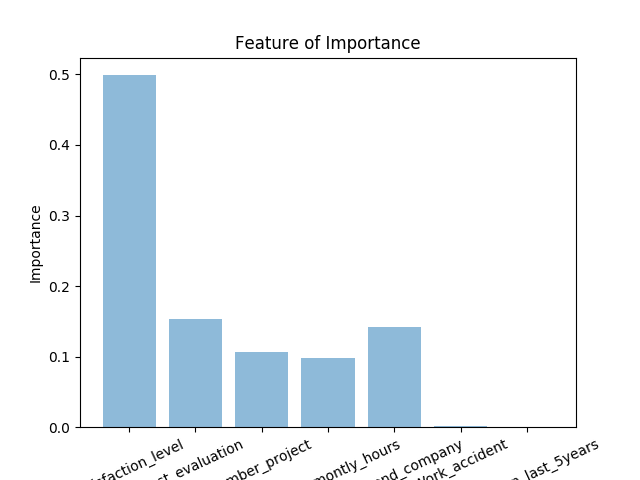

In [46]:
objects = headers
y_pos = np.arange(len(objects))
performance = fi
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
locs, labels = plt.xticks(y_pos, objects)
plt.setp(labels, rotation=25)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature of Importance')
 
plt.show()